In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import random
import os
from pandas.plotting import register_matplotlib_converters
from scipy.interpolate import interp1d
from datetime import datetime

LOAD DATA

In [23]:
charging_dfs = {}

for i in range(1, 10):
    filename = f"data/charger_battery_data_Charger{str(i).zfill(2)}.csv"
    
    if os.path.isfile(filename):
        charging_dfs[i] = pd.read_csv(filename)
        charging_dfs[i] = charging_dfs[i].reset_index()
        charging_dfs[i]['timestamp'] = pd.to_datetime(charging_dfs[i]['timestamp'], utc=True)
        charging_dfs[i].set_index('timestamp', inplace=True)

        charging_dfs[i]['e_grid'] = charging_dfs[i]['e_consumption'] + charging_dfs[i]['e_charger'].fillna(0) - charging_dfs[i]['e_production']
        print("imported: ", filename)
    else:
        continue

imported:  data/charger_battery_data_Charger01.csv
imported:  data/charger_battery_data_Charger02.csv
imported:  data/charger_battery_data_Charger03.csv
imported:  data/charger_battery_data_Charger04.csv
imported:  data/charger_battery_data_Charger05.csv
imported:  data/charger_battery_data_Charger06.csv
imported:  data/charger_battery_data_Charger07.csv
imported:  data/charger_battery_data_Charger08.csv
imported:  data/charger_battery_data_Charger09.csv


DESCRIPTIVE ANALYSIS:

ChargerID: 6
       e_production  e_consumption    e_charger
count  35040.000000   35040.000000  6494.000000
mean     455.129866     340.345698   212.520826
std      710.322041     326.104547   458.488573
min        0.000000       0.000000     0.000000
25%        0.000000      70.000000     0.000000
50%        0.000000     127.000000     0.000000
75%      744.000000     597.000000     0.000000
max     3157.000000    4825.000000  2585.340171
       h_countdown       soc_ev
count  6426.000000  6426.000000
mean     18.203743     0.925129
std      16.928956     0.157635
min       0.250000     0.000000
25%       6.500000     0.952473
50%      13.250000     1.000000
75%      23.500000     1.000000
max      94.250000     1.000000


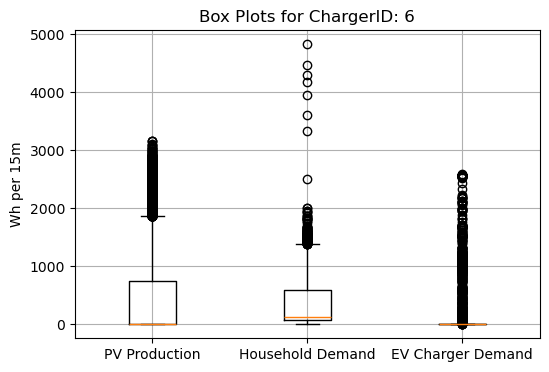

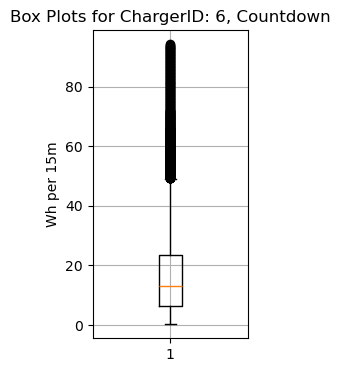

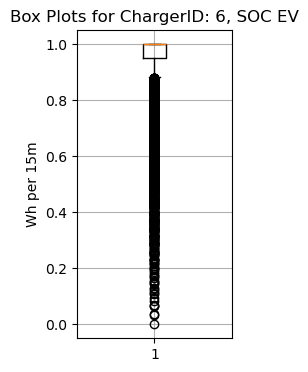

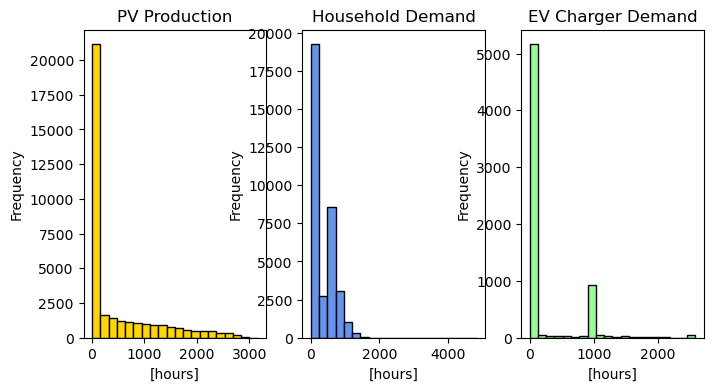

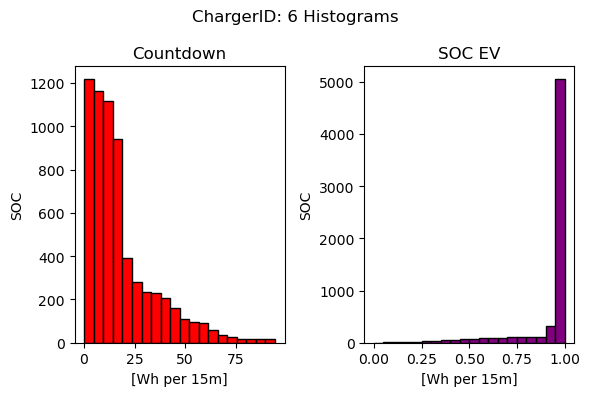

In [24]:
for i, df in charging_dfs.items():
    
    #if i > 1:
    #    continue

    if not i in [6]:
        continue

    columns1 = ['e_production', 'e_consumption', 'e_charger']
    labels1 = ['PV Production', 'Household Demand', 'EV Charger Demand']
    colors1 = ['gold', 'cornflowerblue', 'palegreen']

    columns2 = ['h_countdown', 'soc_ev']
    labels2 = ['Countdown', 'SOC EV']
    colors2 = ['red', 'purple']
    
    
    print("ChargerID:" ,i)
    print(df[columns1].describe())
    print(df[columns2][df[columns2[0]] > 0].describe())

    # create a boxplot for each dataframe
    plt.figure(figsize=(6, 4))
    plt.boxplot([df[col].dropna() for col in columns1], labels=labels1)
    plt.ylabel('Wh per 15m')
    plt.title(f'Box Plots for ChargerID: {i}')
    plt.grid(True)
    plt.savefig(f'data/Box Plots 1 for ChargerID: {i}.png', transparent=True, bbox_inches='tight')
    plt.show()

    for j in range(0,2):
        # create a boxplot for each dataframe
        plt.figure(figsize=(2, 4))
        plt.boxplot(df[columns2[j]][df['h_countdown']>0])
        plt.ylabel('Wh per 15m')
        plt.title(f'Box Plots for ChargerID: {i}, {labels2[j]}')
        plt.grid(True)
        plt.savefig(f'data/ox Plots 2 for ChargerID: {i}, {labels2[j]}.png', transparent=True, bbox_inches='tight')
        plt.show()

    # create histograms for each dataframe
    plt.figure(figsize=(8, 4))
    for j, (col, color, title) in enumerate(zip(columns1, colors1, labels1)):
        plt.subplot(1, 3, j+1)
        plt.hist(df[col].dropna(), bins=20, color=color, edgecolor='black')
        plt.xlabel(f'[hours]')
        plt.ylabel('Frequency')
        plt.title(labels1[j])
    plt.savefig(f'data/ChargerID: {i} Histograms1.png', transparent=True, bbox_inches='tight')


        # create histograms for each dataframe
    plt.figure(figsize=(6, 4))
    for j, (col, color, title) in enumerate(zip(columns2, colors2, labels2)):
        plt.subplot(1, 2, j+1)
        plt.hist(df[col][df['h_countdown']>0], bins=20, color=color, edgecolor='black')
        plt.xlabel(f'[Wh per 15m]')
        plt.ylabel('SOC')
        plt.title(labels2[j])
    plt.savefig(f'data/ChargerID: {i} Histograms2.png', transparent=True, bbox_inches='tight')


    plt.suptitle(f'ChargerID: {i} Histograms')
    plt.tight_layout()
    plt.show()



In [26]:
all_data

,index,serial,charger_id_org,transaction_id,e_production,e_consumption,e_charger,charger_id,h_countdown,soc_ev,e_grid
0,0,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,55.0,0.0,1,9.00,1.0,55.0
1,1,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,37.0,0.0,1,8.75,1.0,37.0
2,2,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,29.0,0.0,1,8.50,1.0,29.0
3,3,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,29.0,0.0,1,8.25,1.0,29.0
4,4,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,52.0,0.0,1,8.00,1.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...
315355,35035,104131.0,9e4eba31-cc44-4355-bd13-98242d8f9865,NaN,0.0,20.0,NaN,9,-1.00,1.0,20.0
315356,35036,104131.0,9e4eba31-cc44-4355-bd13-98242d8f9865,NaN,0.0,17.0,NaN,9,-1.00,1.0,17.0
315357,35037,104131.0,9e4eba31-cc44-4355-bd13-98242d8f9865,NaN,0.0,22.0,NaN,9,-1.00,1.0,22.0
315358,35038,104131.0,9e4eba31-cc44-4355-bd13-98242d8f9865,NaN,0.0,21.0,NaN,9,-1.00,1.0,21.0


        e_production  e_consumption     e_charger
count  315360.000000  315360.000000  26091.000000
mean      314.439203     193.738378    484.023207
std       544.802339     207.178393    776.035927
min         0.000000       0.000000      0.000000
25%         0.000000      66.000000      0.000000
50%         0.000000     117.000000      0.000000
75%       396.000000     206.000000    967.541880
max      3321.000000    4825.000000   2585.340171
        h_countdown        soc_ev
count  25271.000000  25271.000000
mean      10.579577      0.879765
std       12.243418      0.202250
min        0.250000      0.000000
25%        2.500000      0.831368
50%        6.750000      1.000000
75%       13.750000      1.000000
max       94.250000      1.000000


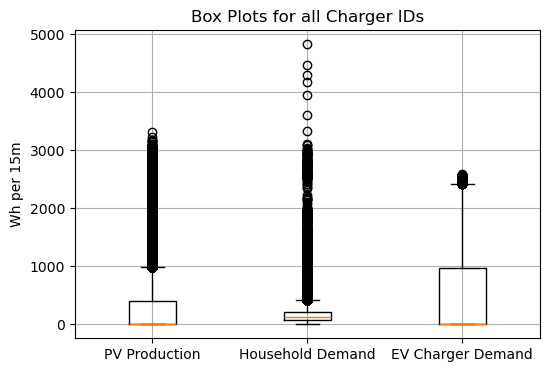

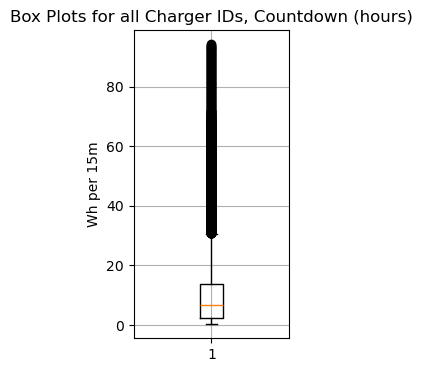

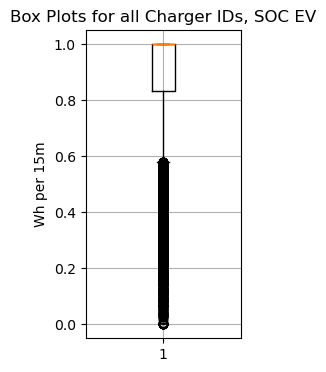

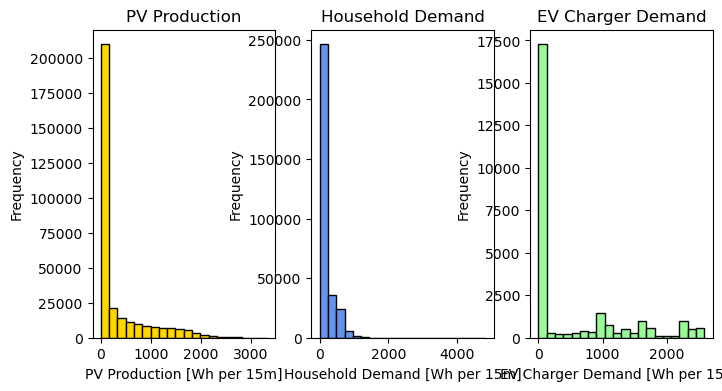

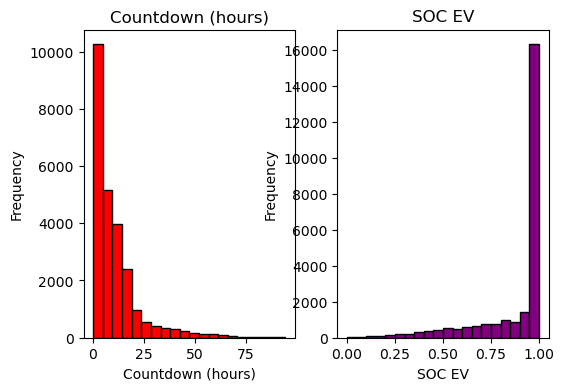

In [25]:

all_data = pd.concat(charging_dfs.values(), ignore_index=True)    

columns1 = ['e_production', 'e_consumption', 'e_charger']
labels1 = ['PV Production', 'Household Demand', 'EV Charger Demand']
colors1 = ['gold', 'cornflowerblue', 'palegreen']

columns2 = ['h_countdown', 'soc_ev']
labels2 = ['Countdown (hours)', 'SOC EV']
colors2 = ['red', 'purple']
    
    
print(all_data[columns1].describe())
print(all_data[columns2][all_data['h_countdown'] > 0].describe())

# create a boxplot for each dataframe
plt.figure(figsize=(6, 4))
plt.boxplot([all_data[col].dropna() for col in columns1], labels=labels1)
plt.ylabel('Wh per 15m')
plt.title(f'Box Plots for all Charger IDs')
plt.grid(True)
plt.show()

for j in range(0,2):
    # create a boxplot for each dataframe
    plt.figure(figsize=(2, 4))
    plt.boxplot(all_data[columns2[j]][all_data['h_countdown']>0])
    plt.ylabel('Wh per 15m')
    plt.title(f'Box Plots for all Charger IDs, {labels2[j]}')
    plt.grid(True)
    plt.show()

# create histograms for each dataframe
plt.figure(figsize=(8, 4))
for j, (col, color, title) in enumerate(zip(columns1, colors1, labels1)):
    plt.subplot(1, 3, j+1)
    plt.hist(all_data[col].dropna(), bins=20, color=color, edgecolor='black')
    plt.xlabel(f'{title} [Wh per 15m]')
    plt.ylabel('Frequency')
    plt.title(title)

    # create histograms for each dataframe
plt.figure(figsize=(6, 4))
for j, (col, color, title) in enumerate(zip(columns2, colors2, labels2)):
    plt.subplot(1, 2, j+1)
    plt.hist(all_data[col][all_data['h_countdown']>0], bins=20, color=color, edgecolor='black')
    plt.xlabel(f'{title}')
    plt.ylabel('Frequency')
    plt.title(title)

In [6]:
e_production_colors = ['gold', 'orange', 'brown']
e_consumption_colors = ['deepskyblue', 'cornflowerblue', 'purple']
e_charger_colors = ['palegreen', 'mediumseagreen', 'forestgreen']

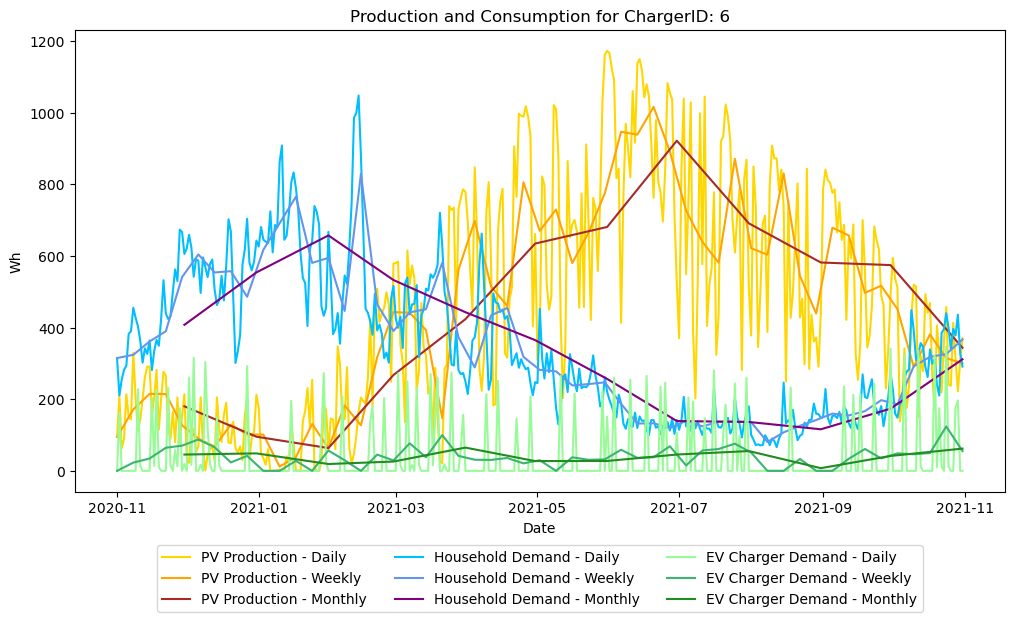

In [7]:

for i, dfi in charging_dfs.items():
    # fill NaNs in 'e_charger' with 0
    #df['e_charger'].fillna(0, inplace=True)
    
    df = dfi.fillna({'e_charger':0}, inplace=False)

    #if i > 1:
    #    continue
    if not i in [6]:
        continue

    # Resample the time series to daily, weekly, and monthly frequencies
    plt.figure(figsize=(12, 6))
    plt.plot(df.resample('D')['e_production'].mean(), label='PV Production - Daily', color=e_production_colors[0])
    plt.plot(df.resample('W')['e_production'].mean(), label='PV Production - Weekly', color=e_production_colors[1])
    plt.plot(df.resample('ME')['e_production'].mean(), label='PV Production - Monthly', color=e_production_colors[2])

    plt.plot(df.resample('D')['e_consumption'].mean(), label='Household Demand - Daily', color=e_consumption_colors[0])
    plt.plot(df.resample('W')['e_consumption'].mean(), label='Household Demand - Weekly', color=e_consumption_colors[1])
    plt.plot(df.resample('ME')['e_consumption'].mean(), label='Household Demand - Monthly', color=e_consumption_colors[2])

    plt.plot(df.resample('D')['e_charger'].mean(), label='EV Charger Demand - Daily', color=e_charger_colors[0])
    plt.plot(df.resample('W')['e_charger'].mean(), label='EV Charger Demand - Weekly', color=e_charger_colors[1])
    plt.plot(df.resample('ME')['e_charger'].mean(), label='EV Charger Demand - Monthly', color=e_charger_colors[2])

    plt.xlabel('Date')
    plt.ylabel('Wh')

    # Move the legend underneath the plot and make it wider with multiple columns
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

    plt.title(f'Production and Consumption for ChargerID: {i}')

    # Save the figure with transparent background
    plt.savefig(f'data/Production_and_Consumption_ChargerID{i}.png', transparent=True, bbox_inches='tight')

    plt.show()


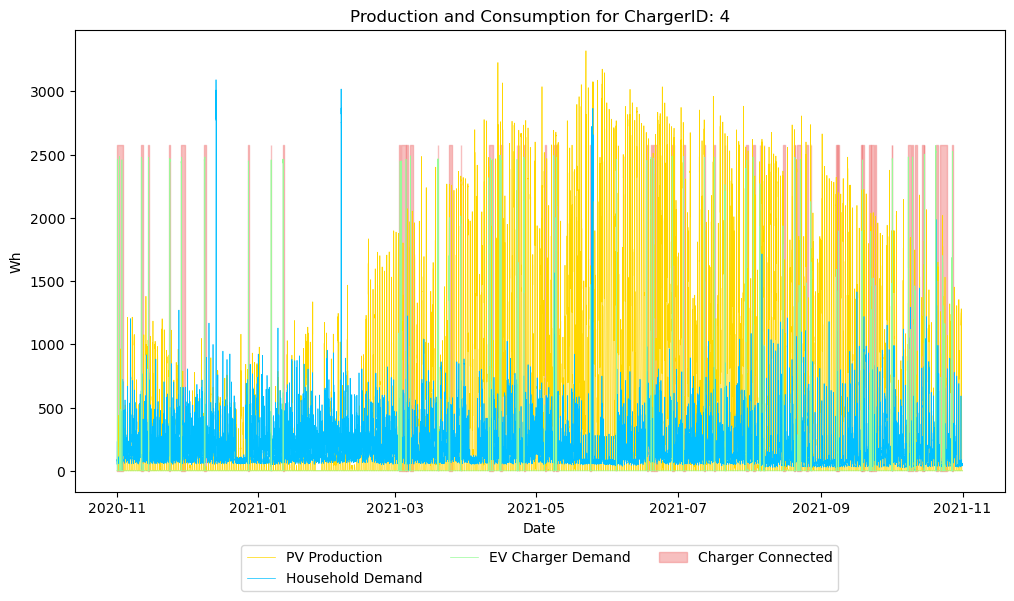

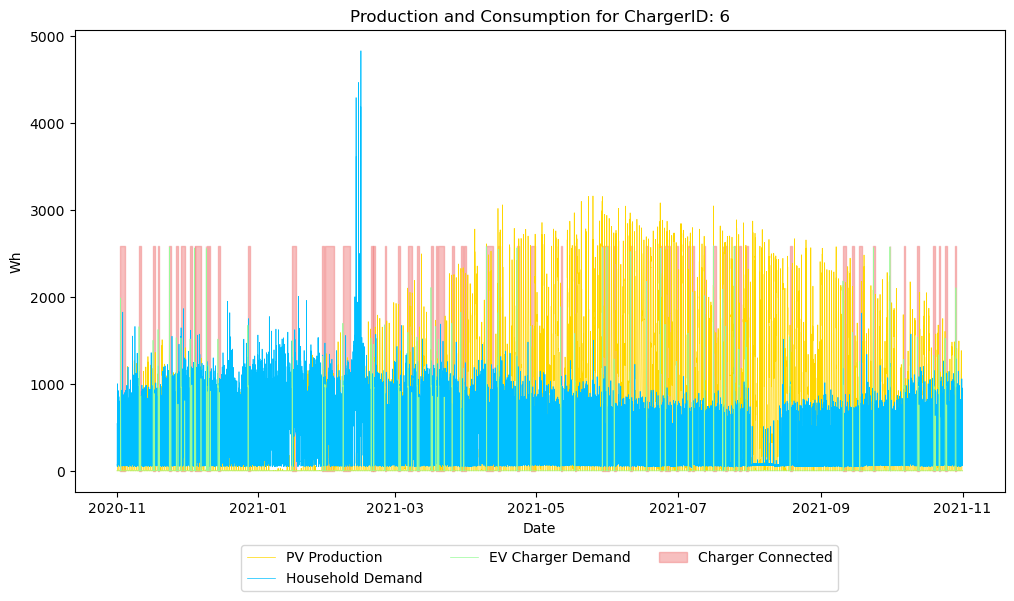

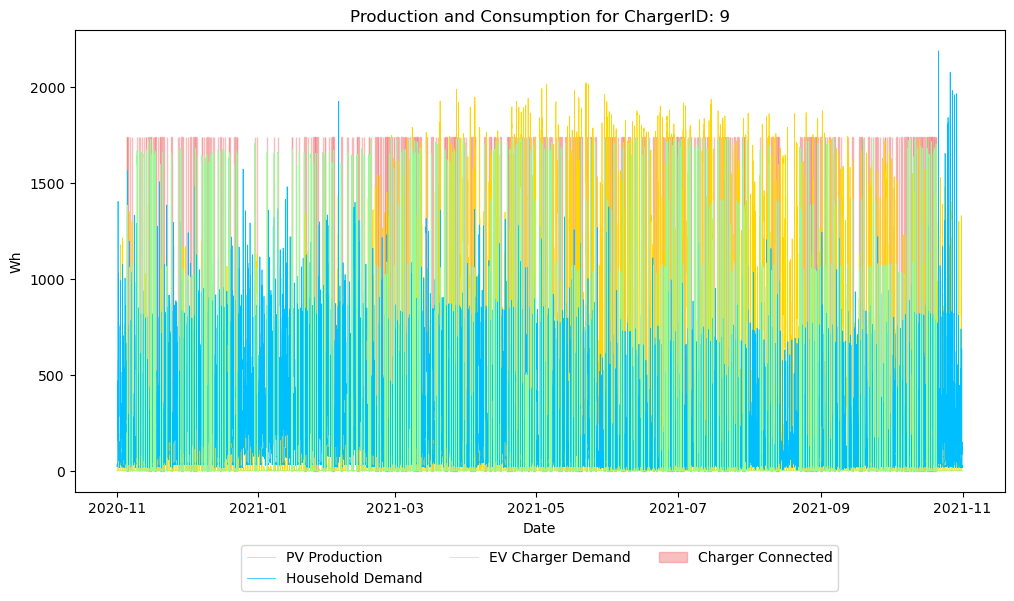

In [8]:
for i, dfi in charging_dfs.items():

    if not i in [4,6,9]:
        continue

    # fill NaNs in 'e_charger' with 0
    df = dfi.fillna({'e_charger':0}, inplace=False)

    # Resample the time series to daily, weekly, and monthly frequencies
    plt.figure(figsize=(12, 6))
    plt.plot(df['e_production'], label='PV Production', color=e_production_colors[0], linewidth=0.5)
    plt.plot(df['e_consumption'], label='Household Demand', color=e_consumption_colors[0], linewidth=0.5)
    plt.plot(df['e_charger'], label='EV Charger Demand', color=e_charger_colors[0], linewidth=0.5)

    # Highlight the background whenever 'e_charger' is not NaN
    plt.fill_between(dfi.index, 0, dfi['e_charger'].max(), where=np.isfinite(dfi['e_charger']), color='lightcoral', alpha=0.5, label='Charger Connected')

    plt.xlabel('Date')
    plt.ylabel('Wh')

    # Move the legend underneath the plot and make it wider with multiple columns
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

    plt.title(f'Production and Consumption for ChargerID: {i}')

    # Save the figure with transparent background
    #plt.savefig(f'Production_and_Consumption_{i}.png', transparent=True, bbox_inches='tight')

    plt.show()


In [9]:
charging_dfs[1]

,index,serial,charger_id_org,transaction_id,e_production,e_consumption,e_charger,charger_id,h_countdown,soc_ev,e_grid
timestamp,,,,,,,,,,,
2020-11-01 00:00:00+00:00,0,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,55.0,0.0,1,9.00,1.0,55.0
2020-11-01 00:15:00+00:00,1,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,37.0,0.0,1,8.75,1.0,37.0
2020-11-01 00:30:00+00:00,2,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,29.0,0.0,1,8.50,1.0,29.0
2020-11-01 00:45:00+00:00,3,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,29.0,0.0,1,8.25,1.0,29.0
2020-11-01 01:00:00+00:00,4,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,13.0,0.0,52.0,0.0,1,8.00,1.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31 22:45:00+00:00,35035,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,NaN,0.0,41.0,NaN,1,-1.00,1.0,41.0
2021-10-31 23:00:00+00:00,35036,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,NaN,0.0,47.0,NaN,1,-1.00,1.0,47.0
2021-10-31 23:15:00+00:00,35037,137530.0,12e31b6c-969b-4a0a-b8ad-9be5eb2e5f64,NaN,0.0,64.0,NaN,1,-1.00,1.0,64.0


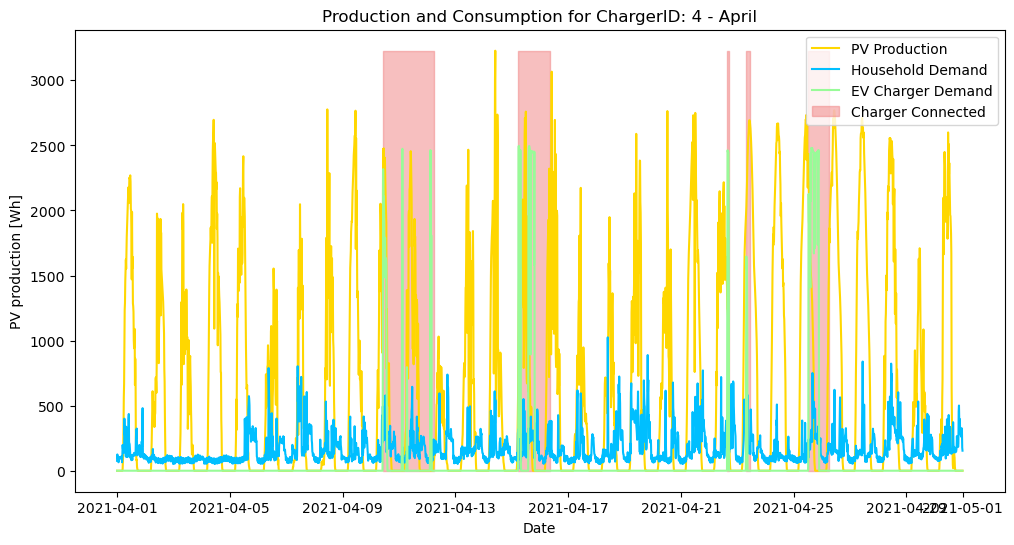

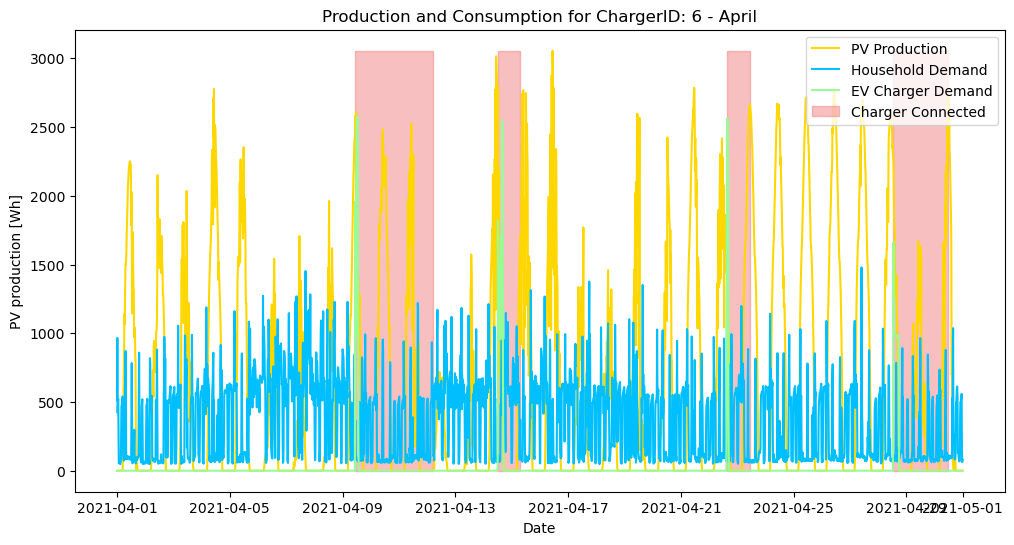

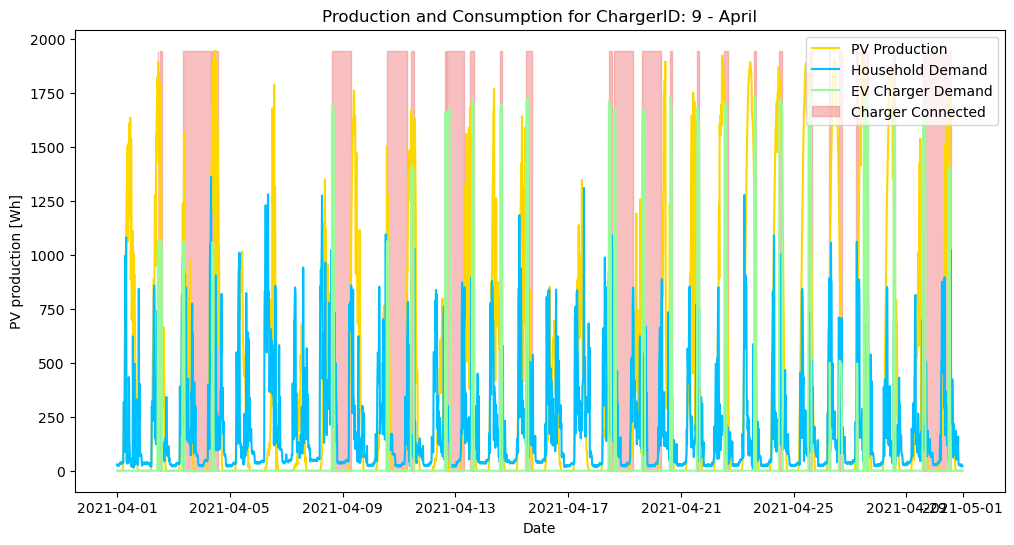

In [10]:

for i, dfi in charging_dfs.items():

    if not i in [4,6,9]:
        continue

    # fill NaNs in 'e_charger' with 0
    df = dfi.fillna({'e_charger':0}, inplace=False)

    plt.figure(figsize=(12, 6))
    # Plot the PV production data for April
    ax1 = plt.gca()
    e_production_line, = ax1.plot(df.loc['2021-04', 'e_production'], label='PV Production', color=e_production_colors[0])

    # Plot the Electrical Demand data for April
    e_consumption_line, = ax1.plot(df.loc['2021-04', 'e_consumption'], label='Household Demand', color=e_consumption_colors[0])

    # Plot the EV Charger Demand data for April
    e_charger_line, = ax1.plot(df.loc['2021-04', 'e_charger'], label='EV Charger Demand', color=e_charger_colors[0])

    # Highlight the background whenever 'e_charger' is not NaN
    charger_connected = ax1.fill_between(dfi.loc['2021-04', 'e_charger'].index, 0, dfi.loc['2021-04', ['e_charger', 'e_consumption', 'e_production']].max().max(),
                                         where=np.isfinite(dfi.loc['2021-04', 'e_charger']), color='lightcoral', alpha=0.5)

    ax1.set_xlabel('Date')
    ax1.set_ylabel('PV production [Wh]')
    ax1.set_title(f'Production and Consumption for ChargerID: {i} - April')

    # Create a patch for the fill_between area and add it to the legend
    charger_connected_patch = mpatches.Patch(color='lightcoral', alpha=0.5, label='Charger Connected')
    lines = [e_production_line, e_consumption_line, e_charger_line, charger_connected_patch]
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc='upper right')

    # Save the figure with transparent background
    #plt.savefig(f'Production_and_Consumption_{i}_April.png', transparent=True)

    plt.show()


2020-12-28
2020-11-17
2021-04-14
2021-03-26


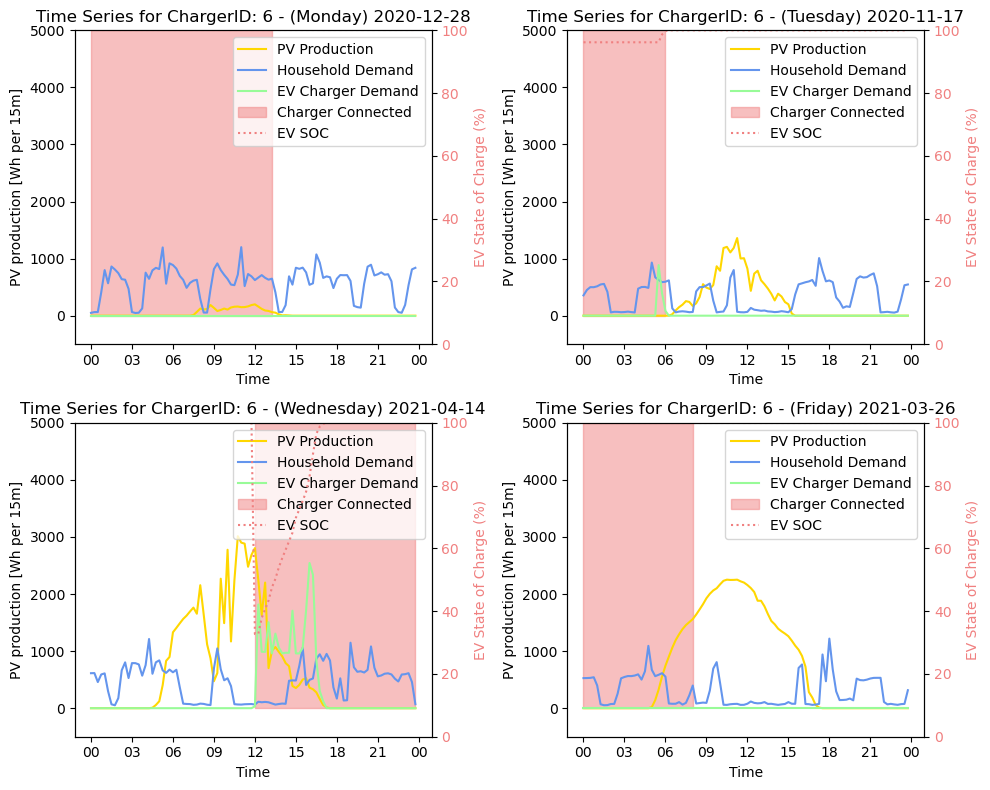

In [11]:
# Define the colors for each group of plots
e_production_colors = 'gold'
e_consumption_colors = 'cornflowerblue'
e_charger_colors = 'palegreen'

# Dates for which you want to plot the data
dates = ['2021-02-19', '2021-07-22', '2021-09-28', '2020-11-28']

# iterate over each dataframe in the dictionary
for i, dfi in charging_dfs.items():

    if not i in [6]:
        continue

    # Resample the data to daily frequency, taking the max value each day
    dfi_copy = dfi.copy()
    daily_data = dfi_copy.resample('D').max()
    valid_dates = daily_data[daily_data['e_charger'].notna()].index
    num_dates = min(4, len(valid_dates))
    random.seed(42)
    dates = random.sample(list(valid_dates), num_dates)


    # fill NaNs in 'e_charger' with 0
    df = dfi.fillna({'e_charger':0}, inplace=False)

    # Create subplots grid
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    # Plotting loop
    for j, date in enumerate(dates):
        # Determine the subplot position
        row = j // 2
        col = j % 2
        date = date.strftime('%Y-%m-%d')
        print(date)
        # Get the corresponding axis
        ax = axes[row, col]

        # Plot the PV production data for the specific date
        ax.plot(df.loc[date, 'e_production'], label='PV Production', color=e_production_colors)

        # Plot the Electrical Demand data for the specific date
        ax.plot(df.loc[date, 'e_consumption'], label='Household Demand', color=e_consumption_colors)

        # Plot the EV Charger Demand data for the specific date
        ax.plot(df.loc[date, 'e_charger'], label='EV Charger Demand', color=e_charger_colors)

        # Highlight the background whenever 'e_charger' is not NaN
        ax.fill_between(dfi.loc[date, 'e_charger'].index, 0, 5000, #change when no ylim #dfi.loc[date, ['e_charger', 'e_consumption', 'e_production']].max().max(),
                                             where=np.isfinite(dfi.loc[date, 'e_charger']), color='lightcoral', alpha=0.5, label='Charger Connected')

        ax.set_ylim(-500, 5000)

        # Change x axis format to just hours
        ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H'))

            # Create a twin axis for temperature
        ax2 = ax.twinx()
        ax2.plot((df.loc[date, 'soc_ev'] * 100), label='EV SOC', color='lightcoral', linestyle='dotted')
        ax2.set_ylabel('EV State of Charge (%)', color='lightcoral')
        ax2.tick_params(axis='y', labelcolor='lightcoral')

        ax2.set_ylim(0, 100)

        # extract weekday name
        specific_date = datetime.strptime(date, "%Y-%m-%d").date()
        weekday = specific_date.strftime("%A")

        # Customize the plot
        ax.set_xlabel('Time')
        ax.set_ylabel('PV production [Wh per 15m]')
        ax.set_title(f'Time Series for ChargerID: {i} - ({weekday}) {date}')

        # Combine the legends from both axes
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines + lines2, labels + labels2, loc='upper right')

        # Add the legend
        #ax.legend(loc='upper right')

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Save the plots in one figure and remove the background (make it transparent)
    #fig.savefig(f'four_days_plots_{i}.png', transparent=True)
    plt.savefig(f'data/Four_Days_ChargerID{i}.png', transparent=True, bbox_inches='tight')


    # Display the plots
    plt.show()


Chargers 4, 6 and 9 are the ones with the highest amount of connected times.
Charger 9 has the most, but the mean connection duration is the lowest. There are many short connected times, sometimes multiple per day.
I choose charger 6 for a first trial with DRL.

**Analysis of sonnen-charger results**

In [12]:
import pandas as pd
df = charging_dfs[6][['e_production', 'e_consumption', 'e_charger', 'h_countdown', 'soc_ev']].describe()
df.to_csv('Descriptive_Analysis_charger6.xlsx', sep=',')

This part is for conversion of csv to xls for analysis purposes:

In [13]:
charging_dfs[6].describe()

,index,serial,transaction_id,e_production,e_consumption,e_charger,charger_id,h_countdown,soc_ev,e_grid
count,35040.000000,35040.0,6494.000000,35040.000000,35040.000000,6494.000000,35040.0,35040.000000,35040.000000,35040.000000
mean,17519.500000,136056.0,48.693563,455.129866,340.345698,212.520826,6.0,2.523723,0.986262,-75.397460
std,10115.321053,0.0,18.173294,710.322041,326.104547,458.488573,0.0,10.381204,0.073457,872.722177
min,0.000000,136056.0,18.000000,0.000000,0.000000,0.000000,6.0,-1.000000,0.000000,-3038.000000
25%,8759.750000,136056.0,36.000000,0.000000,70.000000,0.000000,6.0,-1.000000,1.000000,-463.250000
50%,17519.500000,136056.0,47.000000,0.000000,127.000000,0.000000,6.0,-1.000000,1.000000,71.000000
75%,26279.250000,136056.0,63.000000,744.000000,597.000000,0.000000,6.0,-1.000000,1.000000,546.000000
max,35039.000000,136056.0,86.000000,3157.000000,4825.000000,2585.340171,6.0,94.250000,1.000000,4760.000000


In [14]:
def convert_csv(path):
# Import the CSV file
    df = pd.read_csv(f'{path}.csv')

    # Export to Excel
    df.to_excel(f'{path}.xlsx', index=False)

In [15]:
#path = 'out/tracker/1706240609_eval_results_charger_v1_72_1001_300_600_Charger06_all_DDPG_fix_gn.1_restr-train_disc10_12310_best'

#convert_csv(path)


/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/tmp/ipykernel_1891667/237902599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_8th_data[f'{model} BD'] = march_8th_data[f'{model} BD'] * -1
/tmp/ipykernel_1891667/237902599.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

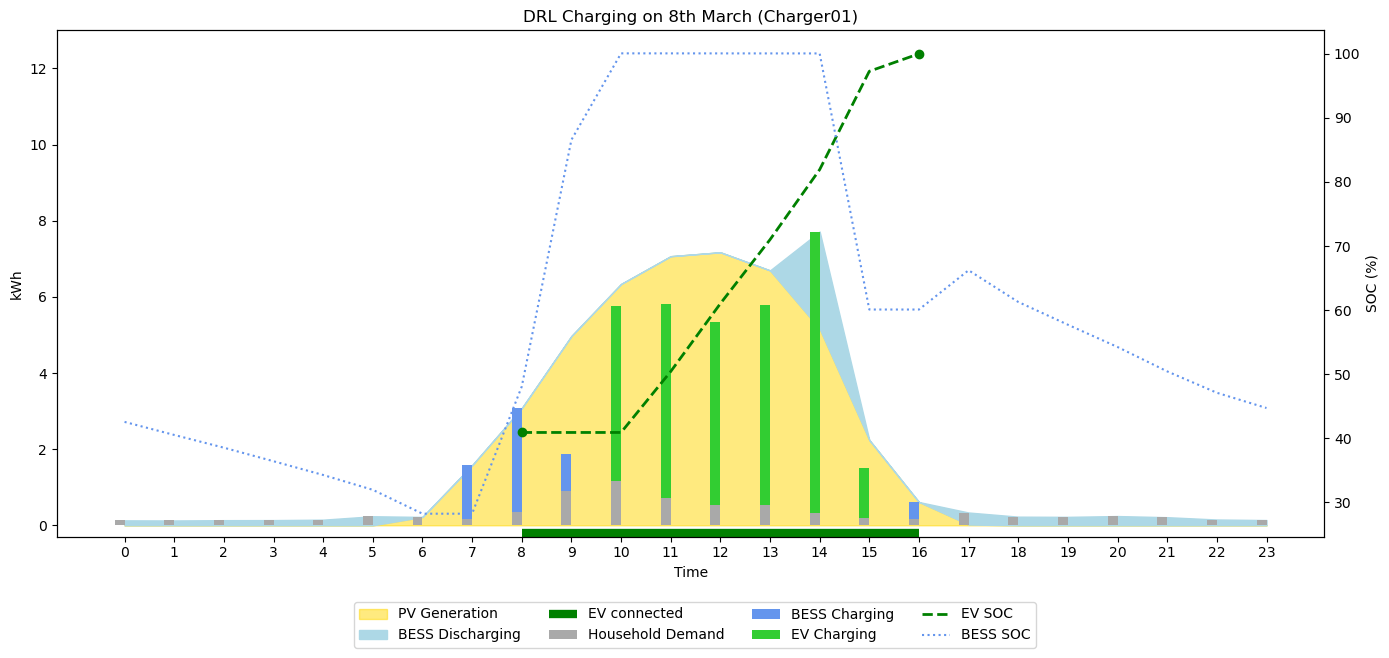

/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/tmp/ipykernel_1891667/237902599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_8th_data[f'{model} BD'] = march_8th_data[f'{model} BD'] * -1
/tmp/ipykernel_1891667/237902599.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

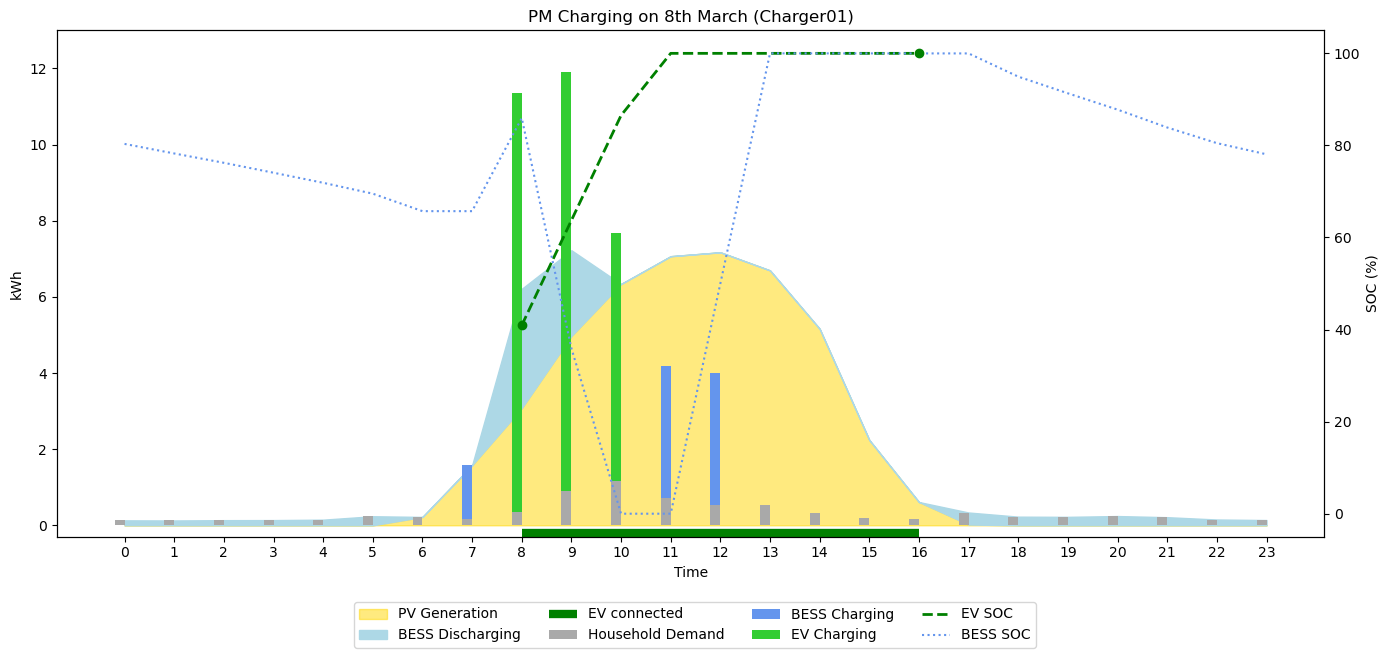

/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/tmp/ipykernel_1891667/237902599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_8th_data[f'{model} BD'] = march_8th_data[f'{model} BD'] * -1
/tmp/ipykernel_1891667/237902599.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

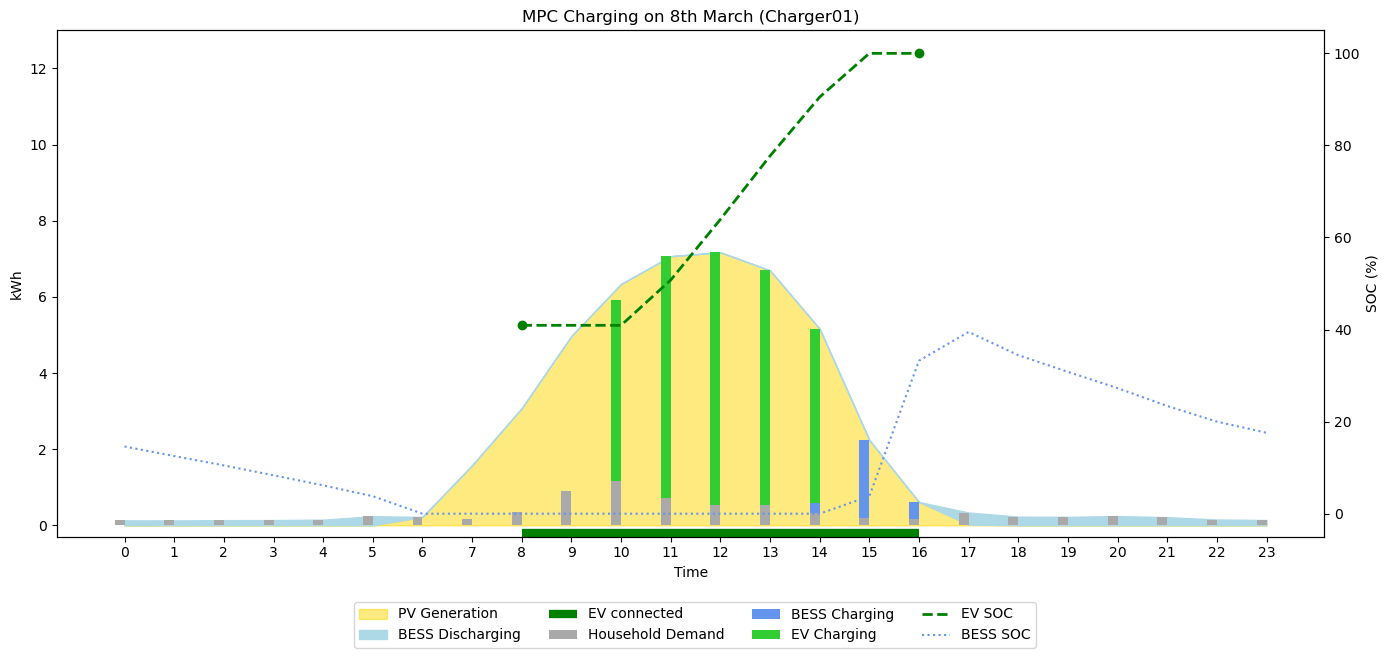

In [106]:
models = ['DRL', 'PM', 'MPC']
for model in models:

    file_path = 'out/Charger01_test_transaction_comparison_PM_DRL_MPC.xlsx'
    df = pd.read_excel(file_path)

    df['year'] = 2020

    # Create a datetime column
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']].rename(columns={'year': 'year', 'month': 'month', 'day': 'day', 'hour': 'hour'}))

    # Filter data for the 8th of March
    march_8th_data = df[(df['datetime'].dt.month == 3) & (df['datetime'].dt.day == 8)]

    # Multiply model BD values by -1 to make them positive
    march_8th_data[f'{model} BD'] = march_8th_data[f'{model} BD'] * -1

    # Scale model SOC_B to percentage
    max_soc_b = 6.73 if model == 'DRL' else 6.6 #march_8th_data[f'{model} SOC_B'].max()
    march_8th_data[f'percentage {model} SOC_B'] = (march_8th_data[f'{model} SOC_B'] / max_soc_b) * 100

    # Convert model SOC_EV to percentage
    march_8th_data[f'{model} SOC_EV'] = march_8th_data[f'{model} SOC_EV'] * 100

    # Mask zero values in model SOC_EV
    march_8th_data[f'{model} SOC_EV'] = np.where(march_8th_data[f'{model} SOC_EV'] > 0, march_8th_data[f'{model} SOC_EV'], np.nan)

    # Plotting
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot PV generation
    ax1.fill_between(march_8th_data['hour'], march_8th_data['PV'], color='gold', alpha=0.5, label='PV Generation')

    # Plot BESS discharging on top of PV
    ax1.fill_between(march_8th_data['hour'], march_8th_data['PV'], march_8th_data['PV'] + march_8th_data[f'{model} BD'], color='lightblue', label='BESS Discharging')

    # Plot stacked bars for Demand, BESS Charging, and EV Charging
    bar_width = 0.2
    ax1.bar(march_8th_data['hour'] - bar_width/2, march_8th_data['DEMAND'], width=bar_width, color='darkgrey', label='Household Demand')
    ax1.bar(march_8th_data['hour'] - bar_width/2, march_8th_data[f'{model} BC'], bottom=march_8th_data['DEMAND'], width=bar_width, color='cornflowerblue', label='BESS Charging')
    ax1.bar(march_8th_data['hour'] - bar_width/2, march_8th_data[f'{model} EV'], bottom=march_8th_data['DEMAND'] + march_8th_data[f'{model} BC'], width=bar_width, color='limegreen', label='EV Charging')

    # Plot EV SOC and BESS SOC on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(march_8th_data['hour'], march_8th_data[f'{model} SOC_EV'], color='green', linestyle='--', linewidth=2, label='EV SOC')
    ax2.plot(march_8th_data['hour'], march_8th_data[f'percentage {model} SOC_B'], 'cornflowerblue', linestyle='dotted', label='BESS SOC')

    # Add markers at the beginning and end of the EV SOC plot line
    ax2.plot(8, march_8th_data.loc[march_8th_data['hour'] == 8, f'{model} SOC_EV'], 'o', color='green')  
    ax2.plot(16, march_8th_data.loc[march_8th_data['hour'] == 16, f'{model} SOC_EV'], 'o', color='green')  

    # Add horizontal line for EV connected
    ax1.hlines(y=-0.2, xmin=8, xmax=16, colors='green', linewidth=6, label='EV connected')

    # Titles and labels
    ax1.set_xlabel('Time')
    ax1.set_ylabel('kWh')
    ax2.set_ylabel('SOC (%)')
    plt.title(f'{model} Charging on 8th March (Charger01)')

    # Set y-axis limit
    ax1.set_ylim(-0.3, 13)

    ax1.set_xticks(march_8th_data['hour'])

    # Legend
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=4)

    # Tight layout
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'Visualization/Charging_Transaction_Example_Charger01_8thMarch_{model}.png', bbox_inches='tight')

    # Show the plot
    plt.show()


/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/tmp/ipykernel_1891667/3954046318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_2nd_data[f'{model} BD'] = march_2nd_data[f'{model} BD'] * -1
/tmp/ipykernel_1891667/3954046318.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

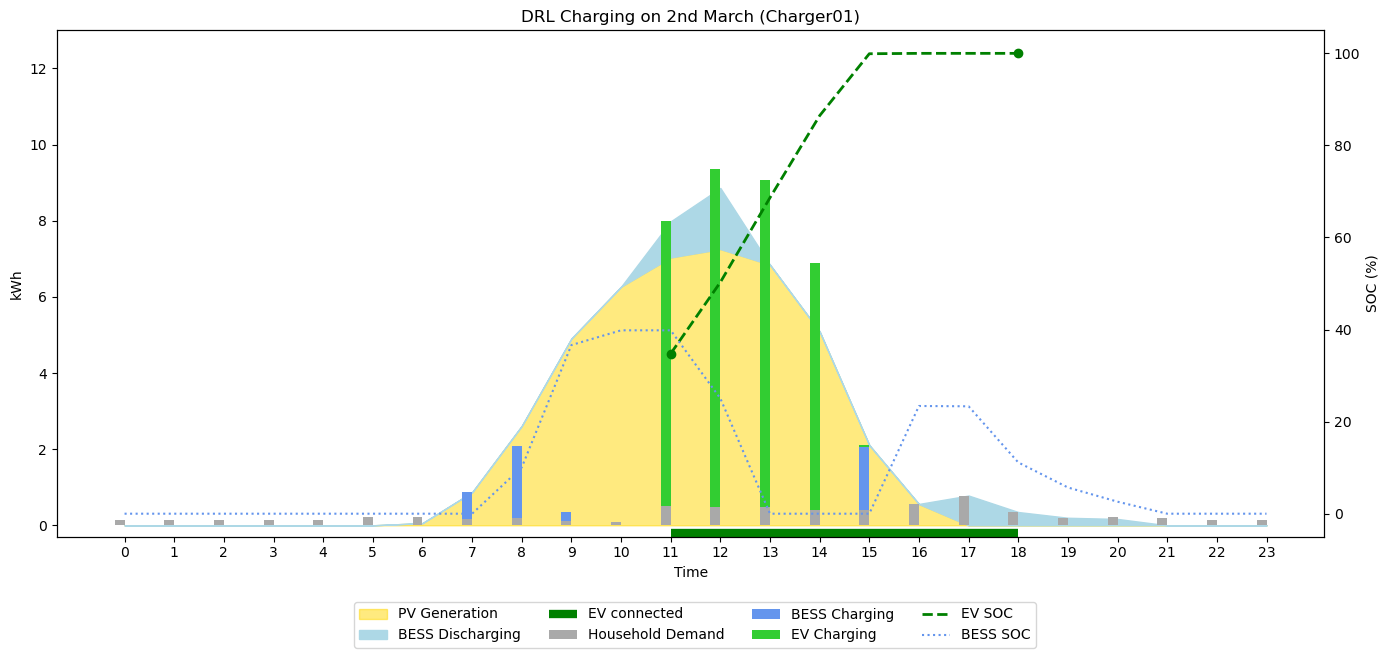

/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/tmp/ipykernel_1891667/3954046318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_2nd_data[f'{model} BD'] = march_2nd_data[f'{model} BD'] * -1
/tmp/ipykernel_1891667/3954046318.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

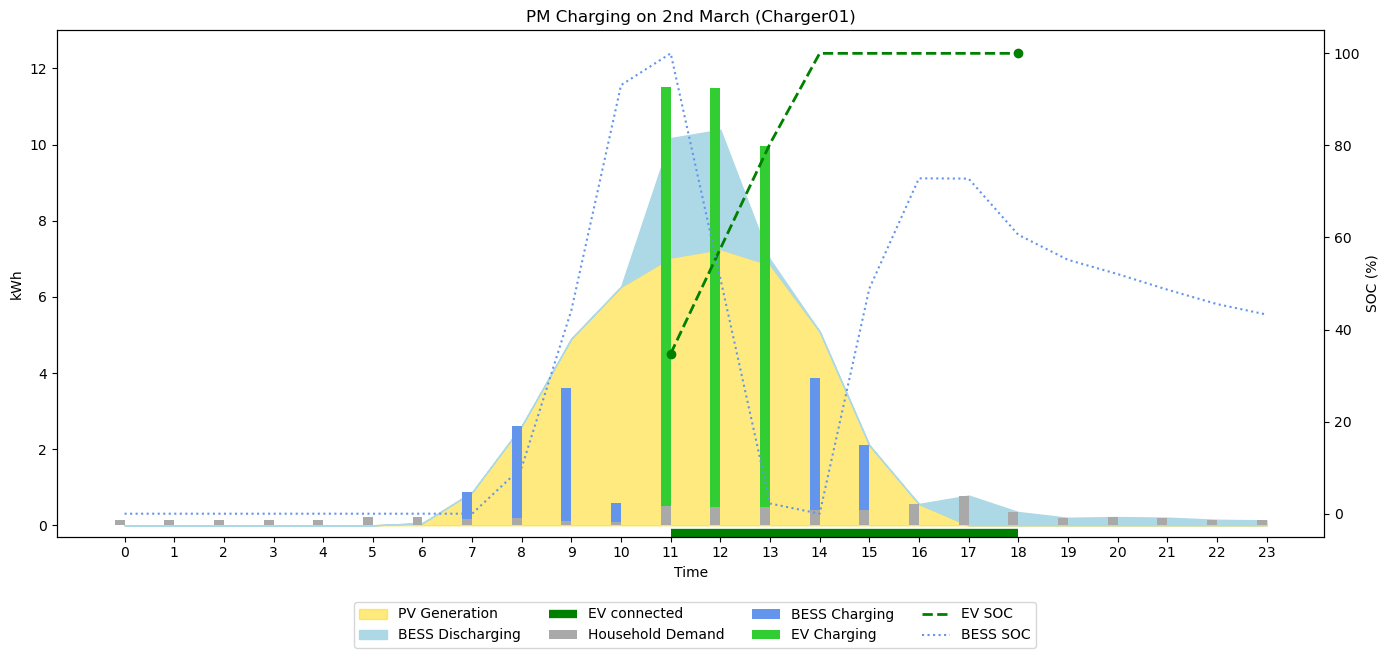

/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/tmp/ipykernel_1891667/3954046318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_2nd_data[f'{model} BD'] = march_2nd_data[f'{model} BD'] * -1
/tmp/ipykernel_1891667/3954046318.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

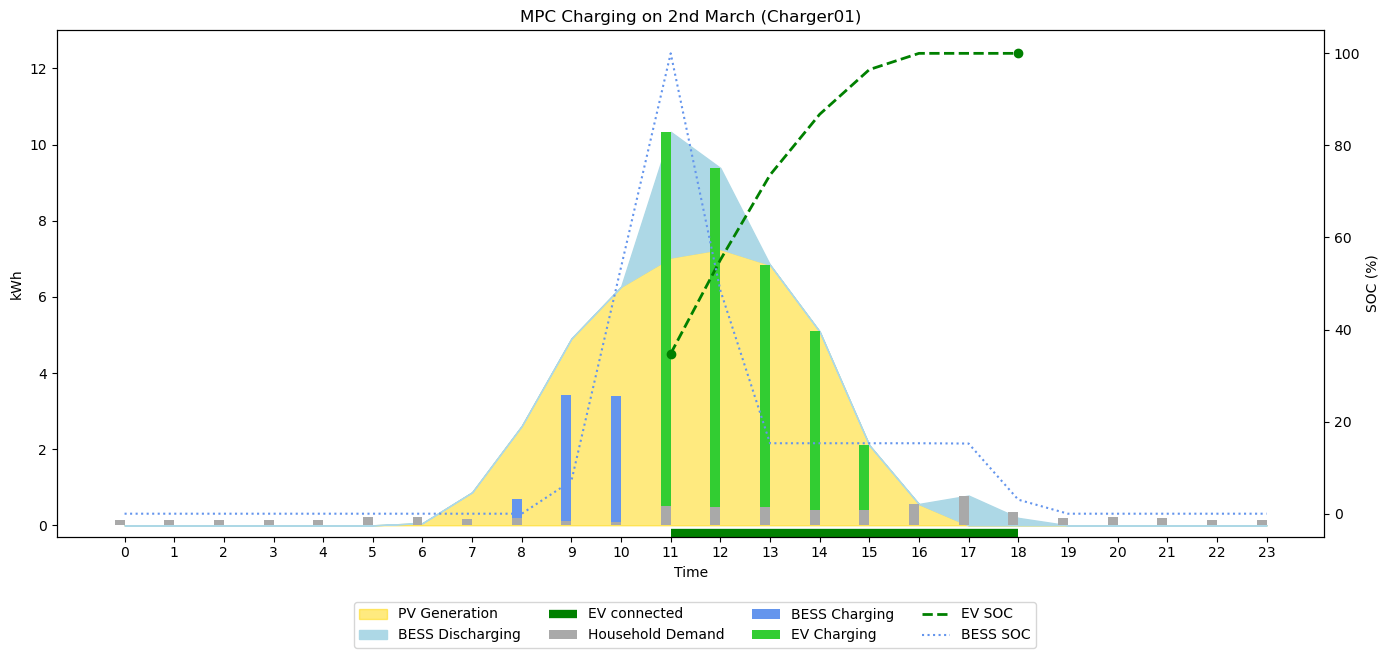

In [105]:

models = ['DRL', 'PM', 'MPC']
for model in models:

    file_path = 'out/Charger01_test_transaction_comparison_PM_DRL_MPC.xlsx'
    df = pd.read_excel(file_path)

    df['year'] = 2020

    # Create a datetime column
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']].rename(columns={'year': 'year', 'month': 'month', 'day': 'day', 'hour': 'hour'}))

    # Filter data for the 2nd of March
    march_2nd_data = df[(df['datetime'].dt.month == 3) & (df['datetime'].dt.day == 2)]

    # Multiply model BD values by -1 to make them positive
    march_2nd_data[f'{model} BD'] = march_2nd_data[f'{model} BD'] * -1

    # Scale model SOC_B to percentage
    max_soc_b = 6.75 #march_2nd_data[f'{model} SOC_B'].max()
    march_2nd_data[f'percentage {model} SOC_B'] = (march_2nd_data[f'{model} SOC_B'] / max_soc_b) * 100

    # Convert model SOC_EV to percentage
    march_2nd_data[f'{model} SOC_EV'] = march_2nd_data[f'{model} SOC_EV'] * 100

    # Mask zero values in model SOC_EV
    march_2nd_data[f'{model} SOC_EV'] = np.where(march_2nd_data[f'{model} SOC_EV'] > 0, march_2nd_data[f'{model} SOC_EV'], np.nan)

    # Plotting
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot PV generation
    ax1.fill_between(march_2nd_data['hour'], march_2nd_data['PV'], color='gold', alpha=0.5, label='PV Generation')

    # Plot BESS discharging on top of PV
    ax1.fill_between(march_2nd_data['hour'], march_2nd_data['PV'], march_2nd_data['PV'] + march_2nd_data[f'{model} BD'], color='lightblue', label='BESS Discharging')

    # Plot stacked bars for Demand, BESS Charging, and EV Charging
    bar_width = 0.2
    ax1.bar(march_2nd_data['hour'] - bar_width/2, march_2nd_data['DEMAND'], width=bar_width, color='darkgrey', label='Household Demand')
    ax1.bar(march_2nd_data['hour'] - bar_width/2, march_2nd_data[f'{model} BC'], bottom=march_2nd_data['DEMAND'], width=bar_width, color='cornflowerblue', label='BESS Charging')
    ax1.bar(march_2nd_data['hour'] - bar_width/2, march_2nd_data[f'{model} EV'], bottom=march_2nd_data['DEMAND'] + march_2nd_data[f'{model} BC'], width=bar_width, color='limegreen', label='EV Charging')

    # Plot EV SOC and BESS SOC on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(march_2nd_data['hour'], march_2nd_data[f'{model} SOC_EV'], color='green', linestyle='--', linewidth=2, label='EV SOC')
    ax2.plot(march_2nd_data['hour'], march_2nd_data[f'percentage {model} SOC_B'], 'cornflowerblue', linestyle='dotted', label='BESS SOC')

    # Add markers at the beginning and end of the EV SOC plot line
    ax2.plot(11, march_2nd_data.loc[march_2nd_data['hour'] == 11, f'{model} SOC_EV'], 'o', color='green')  
    ax2.plot(18, march_2nd_data.loc[march_2nd_data['hour'] == 18, f'{model} SOC_EV'], 'o', color='green')  

    # Add horizontal line for EV connected
    ax1.hlines(y=-0.2, xmin=11, xmax=18, colors='green', linewidth=6, label='EV connected')

    # Titles and labels
    ax1.set_xlabel('Time')
    ax1.set_ylabel('kWh')
    ax2.set_ylabel('SOC (%)')
    plt.title(f'{model} Charging on 2nd March (Charger01)')

    # Set y-axis limit
    ax1.set_ylim(-0.3, 13)

    # Set x-axis ticks to display every hour
    ax1.set_xticks(march_2nd_data['hour'])

    # Legend
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=4)

    # Tight layout
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'Visualization/Charging_Transaction_Example_Charger01_2ndMarch_{model}.png', bbox_inches='tight')

    # Show the plot
    plt.show()


/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/RDC/ullnerle/server_repo/ma-thesis-drl-in-hem/RL-SHEMS/.conda/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/tmp/ipykernel_1891667/3960289604.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_8th_data['PM BD'] = march_8th_data['PM BD'] * -1
/tmp/ipykernel_1891667/3960289604.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

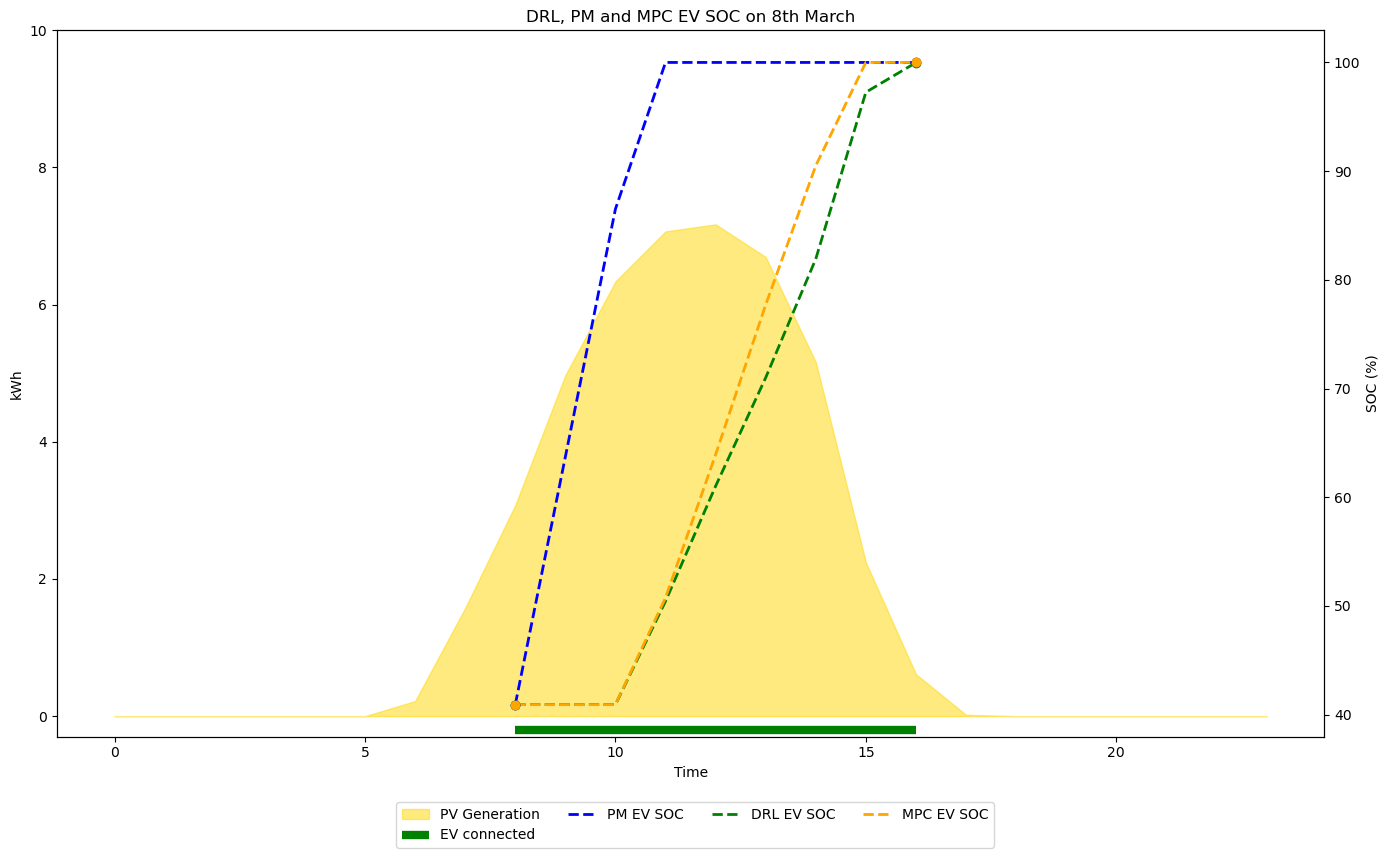

In [66]:
file_path = 'out/Charger01_test_transaction_comparison_PM_DRL_MPC.xlsx'
df = pd.read_excel(file_path)

df['year'] = 2020

# Create a datetime column
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']].rename(columns={'year': 'year', 'month': 'month', 'day': 'day', 'hour': 'hour'}))

# Filter data for the 8th of March
march_8th_data = df[(df['datetime'].dt.month == 3) & (df['datetime'].dt.day == 8)]

# Multiply BD values by -1 to make them positive
march_8th_data['PM BD'] = march_8th_data['PM BD'] * -1
march_8th_data['DRL BD'] = march_8th_data['DRL BD'] * -1
march_8th_data['MPC BD'] = march_8th_data['MPC BD'] * -1

# Scale SOC_B to percentage
max_soc_b = 6.6 #march_8th_data['PM SOC_B'].max()
march_8th_data['percentage PM SOC_B'] = (march_8th_data['PM SOC_B'] / max_soc_b) * 100
march_8th_data['percentage DRL SOC_B'] = (march_8th_data['DRL SOC_B'] / max_soc_b) * 100
march_8th_data['percentage MPC SOC_B'] = (march_8th_data['MPC SOC_B'] / max_soc_b) * 100

# Convert SOC_EV to percentage
march_8th_data['PM SOC_EV'] = march_8th_data['PM SOC_EV'] * 100
march_8th_data['DRL SOC_EV'] = march_8th_data['DRL SOC_EV'] * 100
march_8th_data['MPC SOC_EV'] = march_8th_data['MPC SOC_EV'] * 100

# Mask zero values in PM SOC_EV
march_8th_data['PM SOC_EV'] = np.where(march_8th_data['PM SOC_EV'] > 0, march_8th_data['PM SOC_EV'], np.nan)
march_8th_data['DRL SOC_EV'] = np.where(march_8th_data['DRL SOC_EV'] > 0, march_8th_data['DRL SOC_EV'], np.nan)
march_8th_data['MPC SOC_EV'] = np.where(march_8th_data['MPC SOC_EV'] > 0, march_8th_data['MPC SOC_EV'], np.nan)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot PV generation
ax1.fill_between(march_8th_data['hour'], march_8th_data['PV'], color='gold', alpha=0.5, label='PV Generation')

# Plot EV SOC and BESS SOC on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(march_8th_data['hour'], march_8th_data['PM SOC_EV'], color='blue', linestyle='--', linewidth=2, label='PM EV SOC')
ax2.plot(march_8th_data['hour'], march_8th_data['DRL SOC_EV'], color='green', linestyle='--', linewidth=2, label='DRL EV SOC')
ax2.plot(march_8th_data['hour'], march_8th_data['MPC SOC_EV'], color='orange', linestyle='--', linewidth=2, label='MPC EV SOC')

# Add markers at the beginning and end of the EV SOC plot line
ax2.plot(8, march_8th_data.loc[march_8th_data['hour'] == 8, 'PM SOC_EV'], 'o', color='blue')  
ax2.plot(16, march_8th_data.loc[march_8th_data['hour'] == 16, 'PM SOC_EV'], 'o', color='blue')
ax2.plot(8, march_8th_data.loc[march_8th_data['hour'] == 8, 'DRL SOC_EV'], 'o', color='green')  
ax2.plot(16, march_8th_data.loc[march_8th_data['hour'] == 16, 'DRL SOC_EV'], 'o', color='green')  
ax2.plot(8, march_8th_data.loc[march_8th_data['hour'] == 8, 'MPC SOC_EV'], 'o', color='orange')  
ax2.plot(16, march_8th_data.loc[march_8th_data['hour'] == 16, 'MPC SOC_EV'], 'o', color='orange')  

# Add horizontal line for EV connected
ax1.hlines(y=-0.2, xmin=8, xmax=16, colors='green', linewidth=6, label='EV connected')

# Titles and labels
ax1.set_xlabel('Time')
ax1.set_ylabel('kWh')
ax2.set_ylabel('SOC (%)')
plt.title('DRL, PM and MPC EV SOC on 8th March')

# Set y-axis limit
ax1.set_ylim(-0.3, 10)

# Legend
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=4)

# Tight layout
plt.tight_layout()

# Save the plot
plt.savefig('Visualization/Charging_Transaction_Example_PM_DRL_MPC.png')

# Show the plot
plt.show()
